# StatTutor Lab: Driking Habits and Integrity of College Students

In [21]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import Imputer

%matplotlib inline
sns.set()

In [2]:
data = pd.read_excel('drinking.xls')
data.head()

,Gender,Alcohol,Height,Cheat
0,Female,15,64.0,0
1,Male,14,69.0,0
2,Female,*,66.0,0
3,Female,10,63.0,0
4,Male,30,72.0,0


In [12]:
data.dtypes

Gender      object
Alcohol     object
Height     float64
Cheat        int64
dtype: object

### * are missing values, imput with mean

In [30]:
data.Alcohol.replace('*', np.nan, inplace=True)
alcohol = data.Alcohol.values.reshape(-1, 1)

In [33]:
imputer = Imputer(strategy='mean')
alcohol = imputer.fit_transform(alcohol)

In [42]:
data.Alcohol = alcohol.reshape(-1)
data.describe()

,Alcohol,Height,Cheat
count,236.000000,236.000000,236.000000
mean,4.538835,66.765890,0.084746
std,6.459428,3.814936,0.279095
min,0.000000,59.500000,0.000000
25%,0.000000,64.000000,0.000000
50%,2.000000,67.000000,0.000000
75%,5.000000,69.125000,0.000000
max,36.000000,76.500000,1.000000


#### Out of the first 10 students how many drink 15 or more alcoholic beverages?

In [64]:
data.loc[:10, :].loc[data.Alcohol >= 15]

,Gender,Alcohol,Height,Cheat
0,Female,15.0,64.0,0
4,Male,30.0,72.0,0
5,Female,20.0,67.0,0
6,Male,15.0,69.0,0
7,Male,15.0,74.0,0


#### Out of the first 10 students, how many alcoholic beverages does the tallest student drinks?

In [70]:
data.loc[:10, :].max(axis=0).Height

74.0

In [71]:
data.loc[:10, :].loc[data.Height == 74]

,Gender,Alcohol,Height,Cheat
7,Male,15.0,74.0,0


#### What is the height of the first male in the datafile who would report on cheating?

In [79]:
data.loc[(data.Gender == 'Male') & data.Cheat].iloc[0, :]

Gender     Male
Alcohol       5
Height       64
Cheat         1
Name: 46, dtype: object

### Percentage of students that would call out a cheater

In [51]:
data.shape

(236, 4)

In [53]:
1 - (data.Cheat.sum()/236)

0.9152542372881356

## Distributions

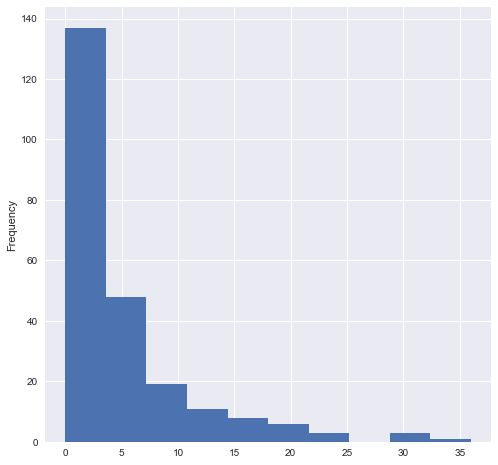

In [46]:
data.Alcohol.plot(kind='hist', bins=10, figsize=(8, 8))

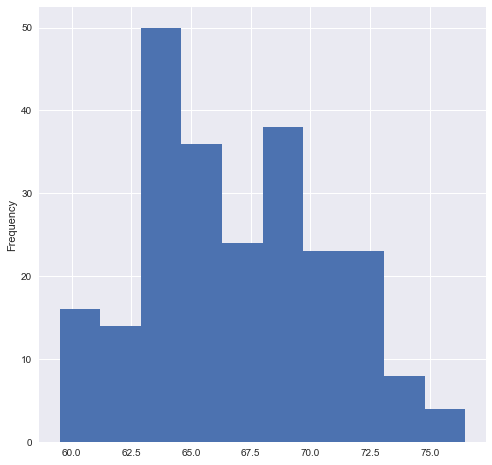

In [47]:
data.Height.plot(kind='hist', bins=10, figsize=(8, 8))

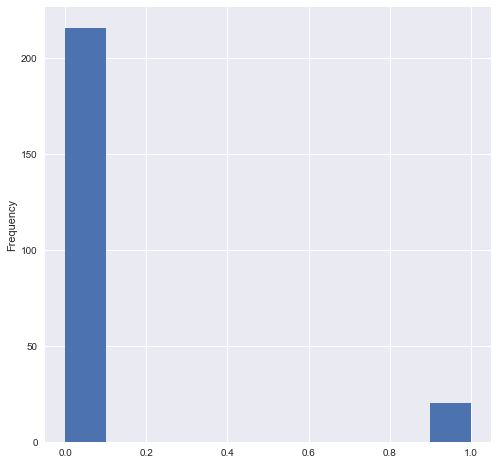

In [48]:
data.Cheat.plot(kind='hist', bins=10, figsize=(8, 8))

#### What are the drinking habits of students at this university? In particular, what is the typical number of drinks a student has during a week? Do the data suggest that drinking is a problem in this university?

In a typical week a student drink on average 4.5 drinks, which seem sensible, the distribution is skewed to the right, indicating that the majority 75% take less than 5 drinks a week, and 50% take less than 2. In other words in this college there's no drinking problem, apart from some outliers that take over 30 drinks in one week.

#### One of the statistics professors at this university uses the honor system when giving exams. If there were cheating going on during her exams, would the professor be likely to know about it?

The professor will most likely not know about cheating going on during exams, the majority (91.5%) of the students would not call out a cheater.